In [2]:
options(warn = -1)
library(tidyverse)
library(ggpubr)
library(patchwork)

In [3]:
dat=read.csv(file = 'data_transformed.csv',encoding="UTF-8")
head(dat)

,X,videoId,publishedAt,category,timePeriod,title,duration,definition,caption,madeForKids,...,publishedAtMonth,publishedAtDay,publishedAtYear,publishedAtHour,publishedAtMinute,publishedAtSec,age,log_views,log_likes,log_comments
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,q07RanslaGM,1562904004,music,before,Ed Sheeran - South of the Border (feat. Camila Cabello & Cardi B) [Official Lyric Video],204,hd,False,False,...,7,12,2019,4,0,4,85967996,18.02872,13.71437,10.073610
2,1,74yb9E3WY1I,1561694400,music,before,Ed Sheeran - Beautiful People (feat. Khalid) [Official Lyric Video],198,hd,False,False,...,6,28,2019,4,0,0,87177600,18.26311,13.53675,9.860789
3,2,_1MnmVjZ__Y,1553014809,music,before,Lukas Graham - Love Someone [Live at Royal Arena],282,hd,False,False,...,3,19,2019,17,0,9,95857191,16.14258,11.53602,7.644919
4,3,mj0XInqZMHY,1561705205,music,before,Ed Sheeran - Beautiful People (feat. Khalid) [Official Music Video],228,hd,False,False,...,6,28,2019,7,0,5,87166795,19.59889,14.78741,10.910076
5,4,uKqRAC-JNOM,1550206805,music,before,Ariana Grande - bloodline (Audio),218,hd,False,False,...,2,15,2019,5,0,5,98665195,17.67952,13.10240,9.288689
6,5,ryJgDL9jzKk,1577008843,music,before,Ed Sheeran - Put It All On Me (feat. Ella Mai) [Official Music Video],218,hd,False,False,...,12,22,2019,10,0,43,71863157,17.92380,13.64523,9.964159


In [4]:
summary(dat)

       X           videoId           publishedAt          category        
 Min.   :  0.0   Length:770         Min.   :1.546e+09   Length:770        
 1st Qu.:218.2   Class :character   1st Qu.:1.575e+09   Class :character  
 Median :457.5   Mode  :character   Median :1.614e+09   Mode  :character  
 Mean   :448.6                      Mean   :1.606e+09                     
 3rd Qu.:683.8                      3rd Qu.:1.636e+09                     
 Max.   :896.0                      Max.   :1.646e+09                     
  timePeriod           title              duration       definition       
 Length:770         Length:770         Min.   :   0.0   Length:770        
 Class :character   Class :character   1st Qu.: 186.2   Class :character  
 Mode  :character   Mode  :character   Median : 254.0   Mode  :character  
                                       Mean   : 378.8                     
                                       3rd Qu.: 427.0                     
                         

In [5]:
str(dat)

'data.frame':	770 obs. of  23 variables:
 $ X                : int  0 1 2 3 4 5 6 7 8 9 ...
 $ videoId          : chr  "q07RanslaGM" "74yb9E3WY1I" "_1MnmVjZ__Y" "mj0XInqZMHY" ...
 $ publishedAt      : num  1.56e+09 1.56e+09 1.55e+09 1.56e+09 1.55e+09 ...
 $ category         : chr  "music" "music" "music" "music" ...
 $ timePeriod       : chr  "before" "before" "before" "before" ...
 $ title            : chr  "Ed Sheeran - South of the Border (feat. Camila Cabello & Cardi B) [Official Lyric Video]" "Ed Sheeran - Beautiful People (feat. Khalid) [Official Lyric Video]" "Lukas Graham - Love Someone [Live at Royal Arena]" "Ed Sheeran - Beautiful People (feat. Khalid) [Official Music Video]" ...
 $ duration         : num  204 198 282 228 218 218 190 162 196 215 ...
 $ definition       : chr  "hd" "hd" "hd" "hd" ...
 $ caption          : chr  "False" "False" "False" "False" ...
 $ madeForKids      : chr  "False" "False" "False" "False" ...
 $ views            : num  6.76e+07 8.54e+07 1.02e+07

In [63]:
dat$category=as.factor(dat$category)
dat$timePeriod=as.factor(dat$timePeriod)
dat$definition=as.factor(dat$definition)
dat$caption=as.factor(dat$caption)
dat$madeForKids=as.factor(dat$madeForKids)
dat$views=as.numeric(dat$views)
dat$likes=as.numeric(dat$likes)
dat$comments=as.numeric(dat$comments)
dat$log_age=log(dat$age)
summary(dat)

       X           videoId           publishedAt                 category  
 Min.   :  0.0   Length:770         Min.   :1.546e+09   comedy       :150  
 1st Qu.:218.2   Class :character   1st Qu.:1.575e+09   education    :127  
 Median :457.5   Mode  :character   Median :1.614e+09   entertainment: 98  
 Mean   :448.6                      Mean   :1.606e+09   music        :149  
 3rd Qu.:683.8                      3rd Qu.:1.636e+09   news/politics:145  
 Max.   :896.0                      Max.   :1.646e+09   science/tech :101  
  timePeriod     title              duration      definition  caption   
 after :277   Length:770         Min.   :   0.0   hd:745     False:471  
 before:254   Class :character   1st Qu.: 186.2   sd: 25     True :299  
 during:239   Mode  :character   Median : 254.0                         
                                 Mean   : 378.8                         
                                 3rd Qu.: 427.0                         
                              

In [64]:
str(dat)

'data.frame':	770 obs. of  24 variables:
 $ X                : int  0 1 2 3 4 5 6 7 8 9 ...
 $ videoId          : chr  "q07RanslaGM" "74yb9E3WY1I" "_1MnmVjZ__Y" "mj0XInqZMHY" ...
 $ publishedAt      : num  1.56e+09 1.56e+09 1.55e+09 1.56e+09 1.55e+09 ...
 $ category         : Factor w/ 6 levels "comedy","education",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ timePeriod       : Factor w/ 3 levels "after","before",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ title            : chr  "Ed Sheeran - South of the Border (feat. Camila Cabello & Cardi B) [Official Lyric Video]" "Ed Sheeran - Beautiful People (feat. Khalid) [Official Lyric Video]" "Lukas Graham - Love Someone [Live at Royal Arena]" "Ed Sheeran - Beautiful People (feat. Khalid) [Official Music Video]" ...
 $ duration         : num  204 198 282 228 218 218 190 162 196 215 ...
 $ definition       : Factor w/ 2 levels "hd","sd": 1 1 1 1 1 1 1 1 1 1 ...
 $ caption          : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 2 1 ...
 $ madeForKids      : Facto

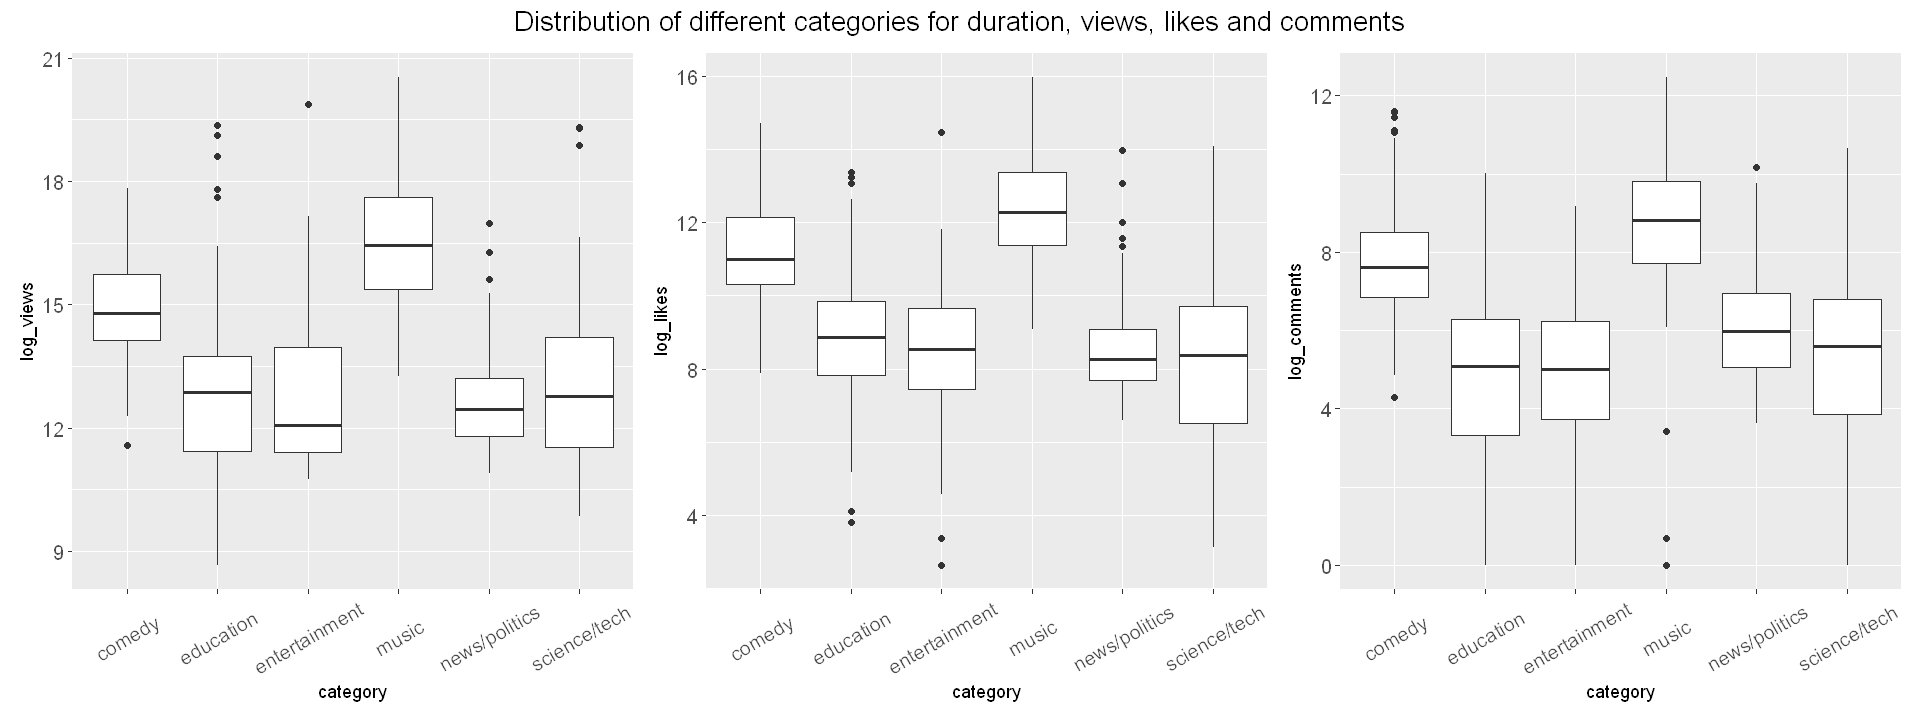

In [35]:
# boxduration <- ggplot(data = dat) + 
#     geom_boxplot(mapping = aes(x = category, y = duration)) +
#     labs(x = 'category', y = 'duration') + 
#     theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))
boxviews <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = category, y = log_views)) +
    labs(x = 'category', y = 'log_views') + 
    theme(axis.text.x = element_text(angle = 30, hjust = 0.5, vjust = 0.5, size=12), axis.text.y = element_text(size=12))
boxlikes <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = category, y = log_likes)) +
    labs(x = 'category', y = 'log_likes') + 
    theme(axis.text.x = element_text(angle = 30, hjust = 0.5, vjust = 0.5, size=12), axis.text.y = element_text(size=12))
boxcomments <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = category, y = log_comments)) +
    labs(x = 'category', y = 'log_comments') + 
    theme(axis.text.x = element_text(angle = 30, hjust = 0.5, vjust = 0.5, size=12), axis.text.y = element_text(size=12))

options(repr.plot.width=16, repr.plot.height=6)
patchwork <- boxviews + boxlikes + boxcomments
patchwork + plot_annotation(
  title = 'Distribution of different categories for duration, views, likes and comments',
  theme = theme(plot.title = element_text(size = 16, hjust = 0.5))
)
# ggarrange(boxduration, boxviews, boxlikes, boxcomments, ncol=2, common.legend=T, legend="bottom")

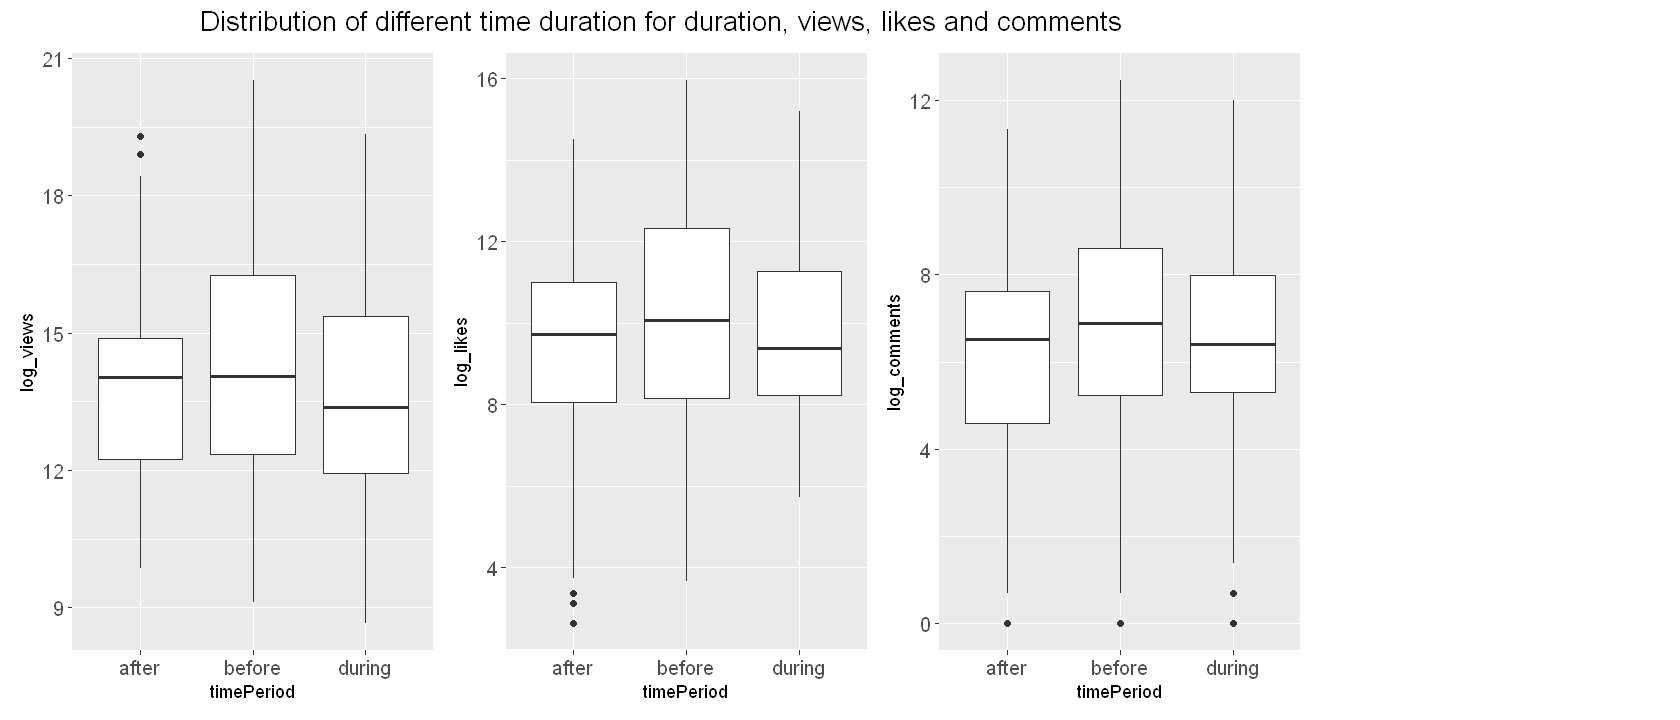

In [41]:
# boxduration <- ggplot(data = dat) + 
#     geom_boxplot(mapping = aes(x = timePeriod, y = duration)) +
#     labs(x = 'timePeriod', y = 'duration') + 
#     theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

boxviews <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = timePeriod, y = log_views)) +
    labs(x = 'timePeriod', y = 'log_views') + 
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

boxlikes <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = timePeriod, y = log_likes)) +
    labs(x = 'timePeriod', y = 'log_likes') + 
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

boxcomments <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = timePeriod, y = log_comments)) +
    labs(x = 'timePeriod', y = 'log_comments') + 
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))


options(repr.plot.width=14, repr.plot.height=6)
patchwork <- boxviews + boxlikes + boxcomments + 
  plot_layout(ncol = 4)
patchwork + plot_annotation(
  title = 'Distribution of different time duration for duration, views, likes and comments',
  theme = theme(plot.title = element_text(size = 16, hjust = 0.25))
)

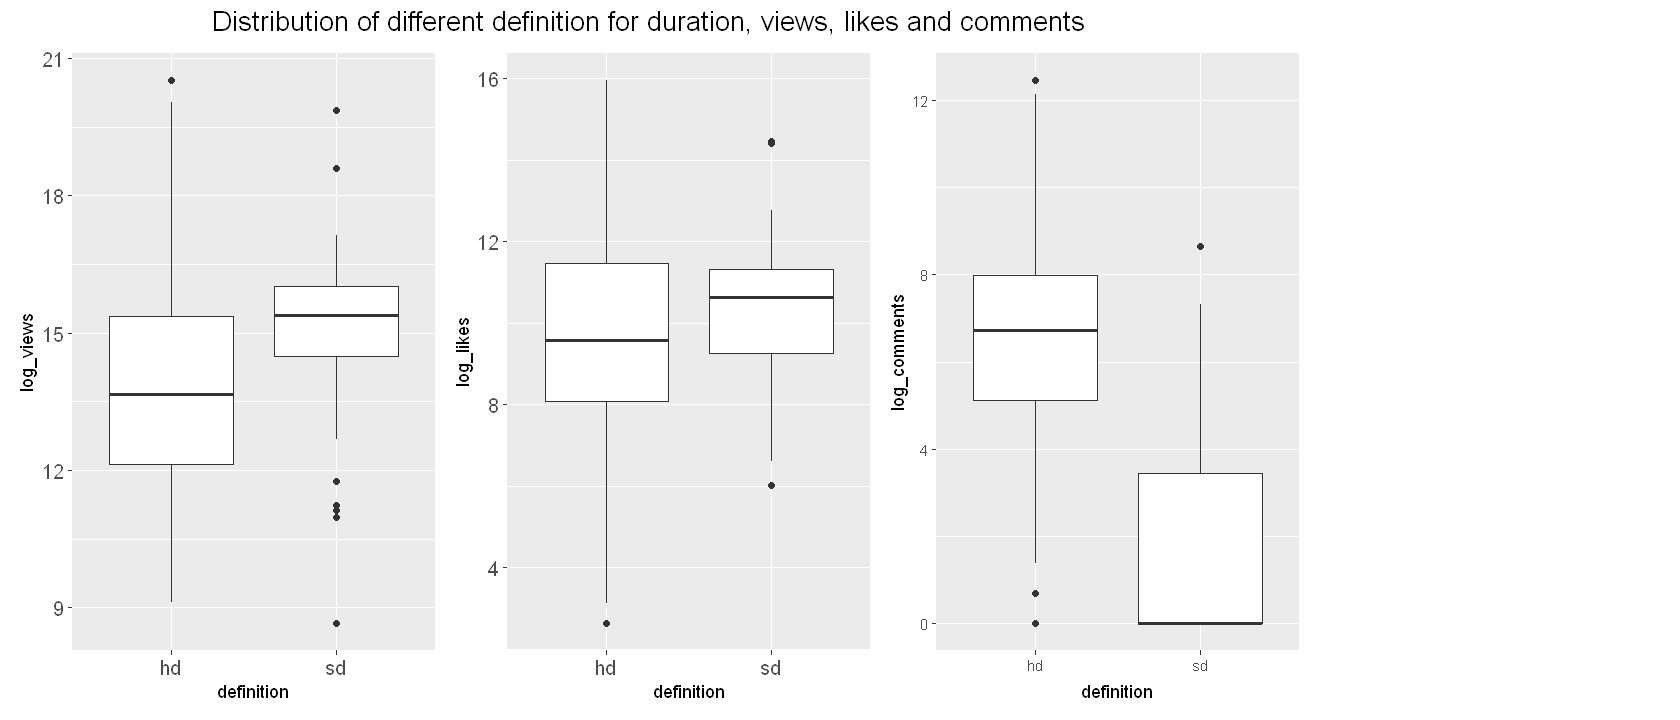

In [40]:
# boxduration <- ggplot(data = dat) + 
#     geom_boxplot(mapping = aes(x = definition, y = duration)) +
#     labs(x = 'definition', y = 'duration') + 
#     theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

boxviews <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = definition, y = log_views)) +
    labs(x = 'definition', y = 'log_views') + 
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

boxlikes <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = definition, y = log_likes)) +
    labs(x = 'definition', y = 'log_likes') + 
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

boxcomments <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = definition, y = log_comments)) +
    labs(x = 'definition', y = 'log_comments')

options(repr.plot.width=14, repr.plot.height=6)
patchwork <- boxviews + boxlikes + boxcomments + 
  plot_layout(ncol = 4)
patchwork + plot_annotation(
  title = 'Distribution of different definition for duration, views, likes and comments',
  theme = theme(plot.title = element_text(size = 16, hjust = 0.25))
)

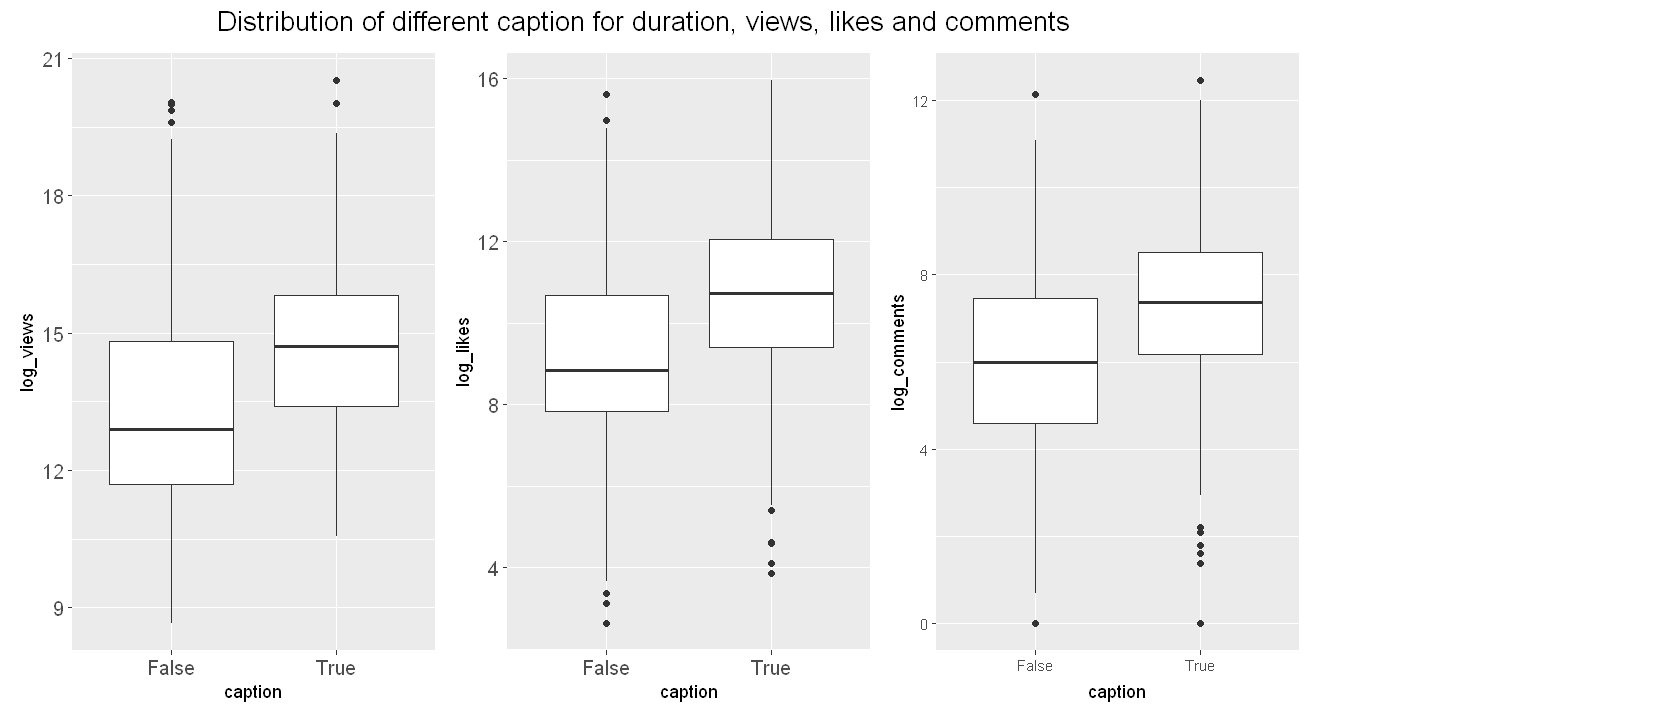

In [43]:
# boxduration <- ggplot(data = dat) + 
#     geom_boxplot(mapping = aes(x = caption, y = duration)) +
#     labs(x = 'caption', y = 'duration') + 
#     theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

boxviews <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = caption, y = log_views)) +
    labs(x = 'caption', y = 'log_views') + 
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

boxlikes <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = caption, y = log_likes)) +
    labs(x = 'caption', y = 'log_likes') + 
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

boxcomments <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = caption, y = log_comments)) +
    labs(x = 'caption', y = 'log_comments')

options(repr.plot.width=14, repr.plot.height=6)
patchwork <- boxviews + boxlikes + boxcomments + 
  plot_layout(ncol = 4)
patchwork + plot_annotation(
  title = 'Distribution of different caption for duration, views, likes and comments',
  theme = theme(plot.title = element_text(size = 16, hjust = 0.25))
)

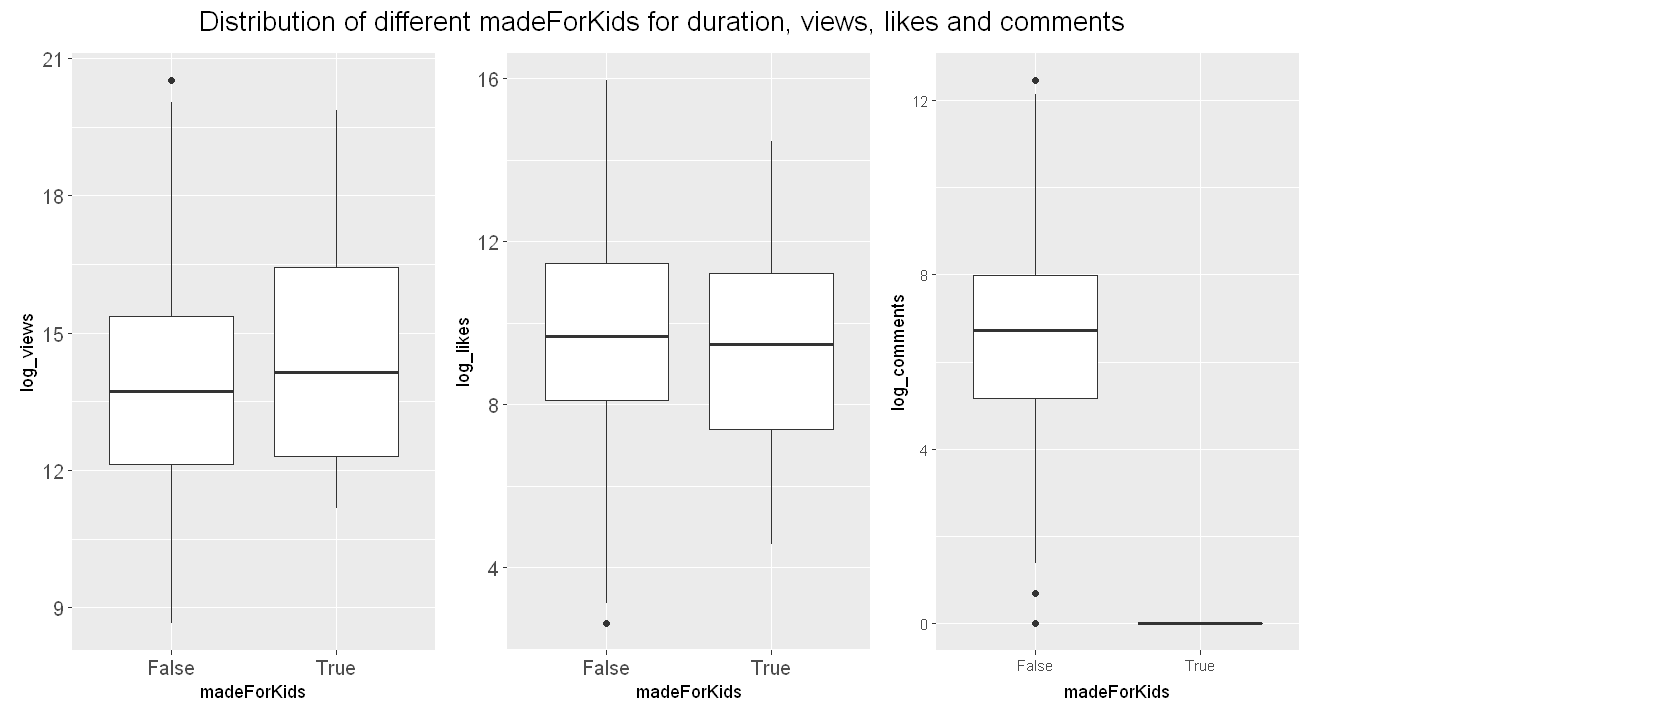

In [48]:
# boxduration <- ggplot(data = dat) + 
#     geom_boxplot(mapping = aes(x = madeForKids, y = duration)) +
#     labs(x = 'madeForKids', y = 'duration') + 
#     theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

boxviews <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = madeForKids, y = log_views)) +
    labs(x = 'madeForKids', y = 'log_views') + 
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

boxlikes <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = madeForKids, y = log_likes)) +
    labs(x = 'madeForKids', y = 'log_likes') + 
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

boxcomments <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = madeForKids, y = log_comments)) +
    labs(x = 'madeForKids', y = 'log_comments')

options(repr.plot.width=14, repr.plot.height=6)
patchwork <- boxviews + boxlikes + boxcomments + 
  plot_layout(ncol = 4)
patchwork + plot_annotation(
  title = 'Distribution of different madeForKids for duration, views, likes and comments',
  theme = theme(plot.title = element_text(size = 16, hjust = 0.25))
)

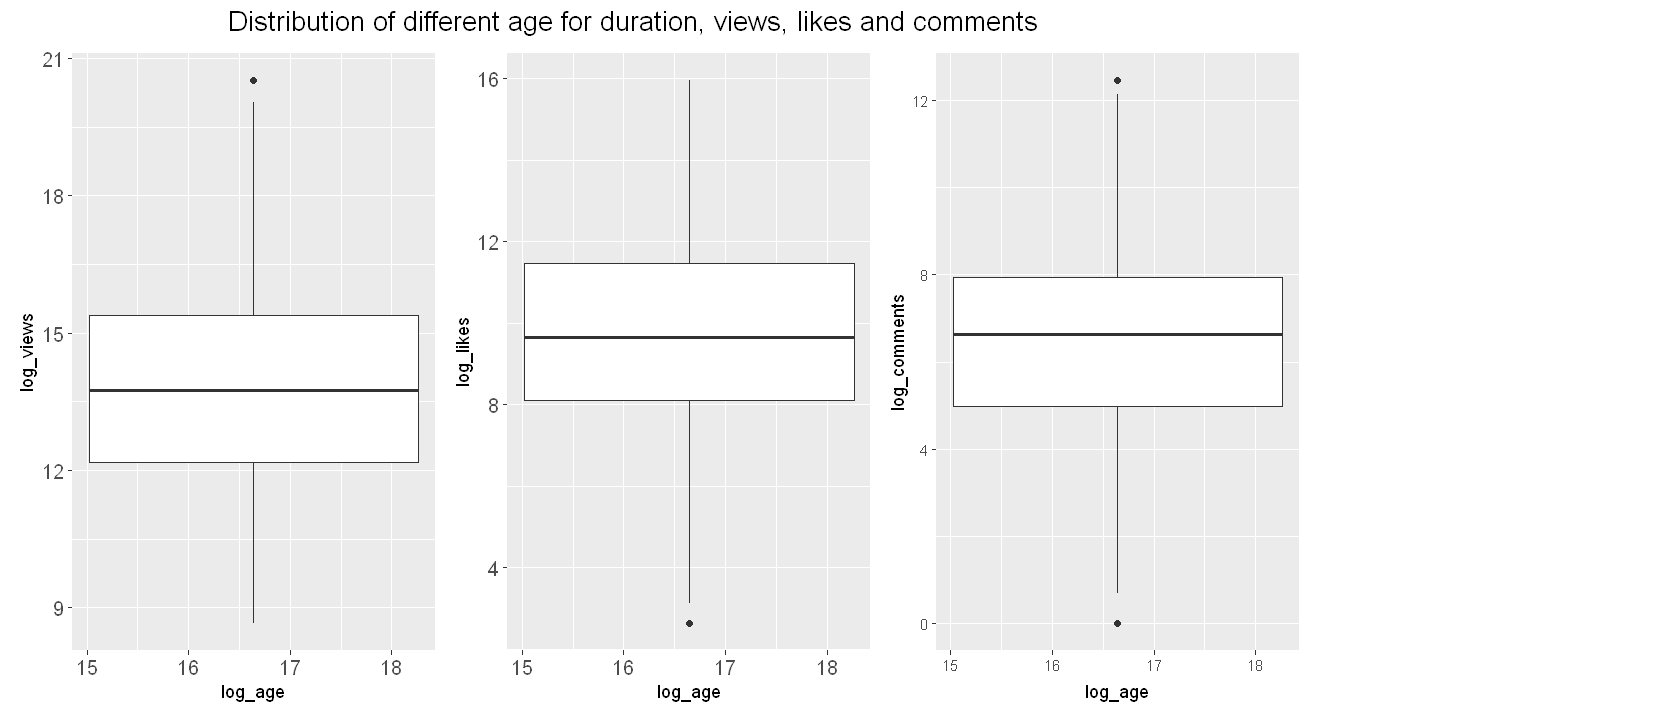

In [66]:
# boxduration <- ggplot(data = dat) + 
#     geom_boxplot(mapping = aes(x = age, y = duration)) +
#     labs(x = 'age', y = 'duration') + 
#     theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

boxviews <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = log_age, y = log_views)) +
    labs(x = 'log_age', y = 'log_views') + 
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

boxlikes <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = log_age, y = log_likes)) +
    labs(x = 'log_age', y = 'log_likes') + 
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

boxcomments <- ggplot(data = dat) + 
    geom_boxplot(mapping = aes(x = log_age, y = log_comments)) +
    labs(x = 'log_age', y = 'log_comments')

options(repr.plot.width=14, repr.plot.height=6)
patchwork <- boxviews + boxlikes + boxcomments + 
  plot_layout(ncol = 4)
patchwork + plot_annotation(
  title = 'Distribution of different age for duration, views, likes and comments',
  theme = theme(plot.title = element_text(size = 16, hjust = 0.25))
)

In [15]:
library(GGally)

In [16]:
options(repr.plot.width=14, repr.plot.height=7)

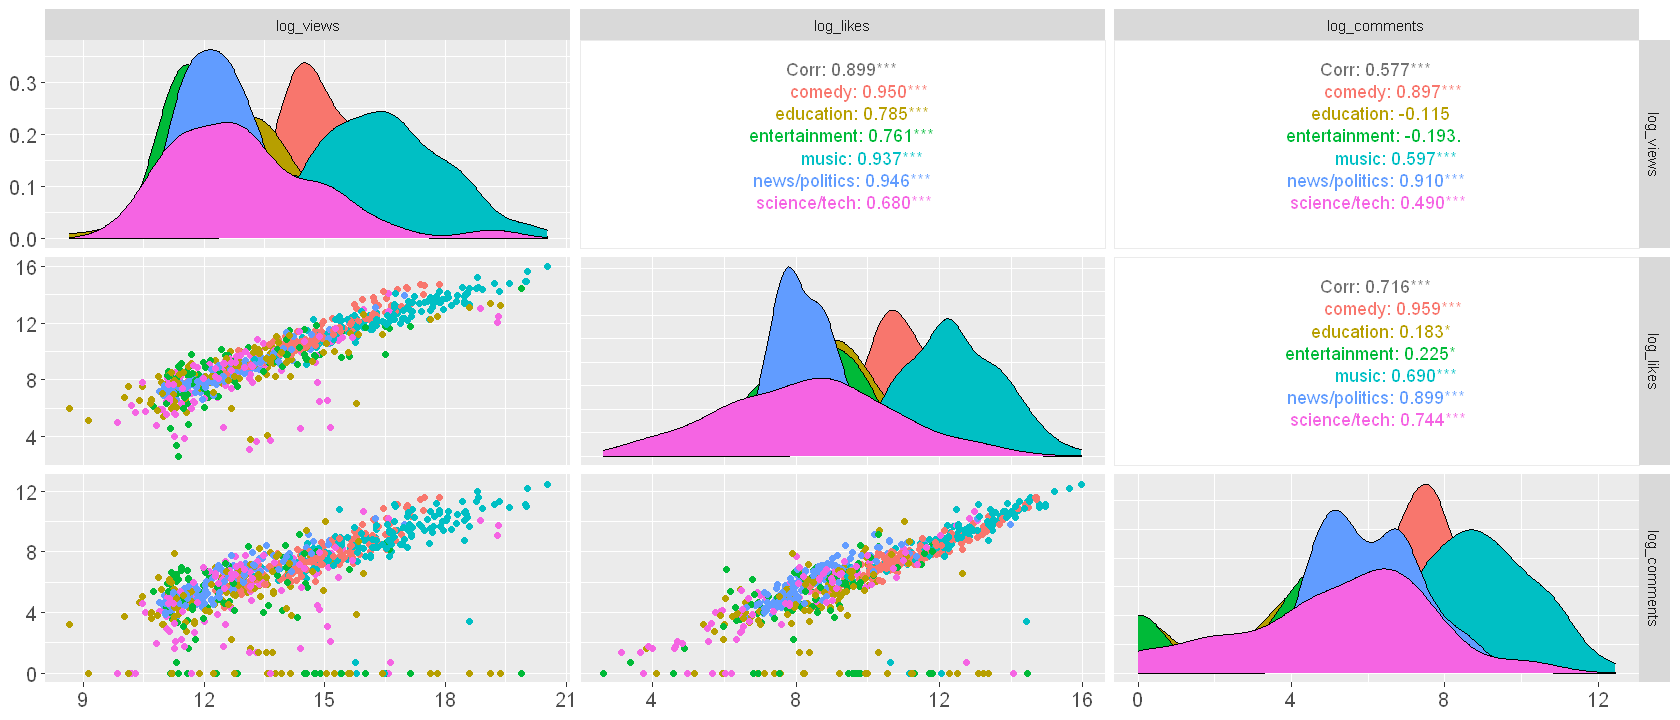

In [71]:
dat1=dat
dat1$duration=as.numeric(dat1$duration)
ggpairs(data = dat1, columns = c(21,22,23),mapping=aes(color=category)) +
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

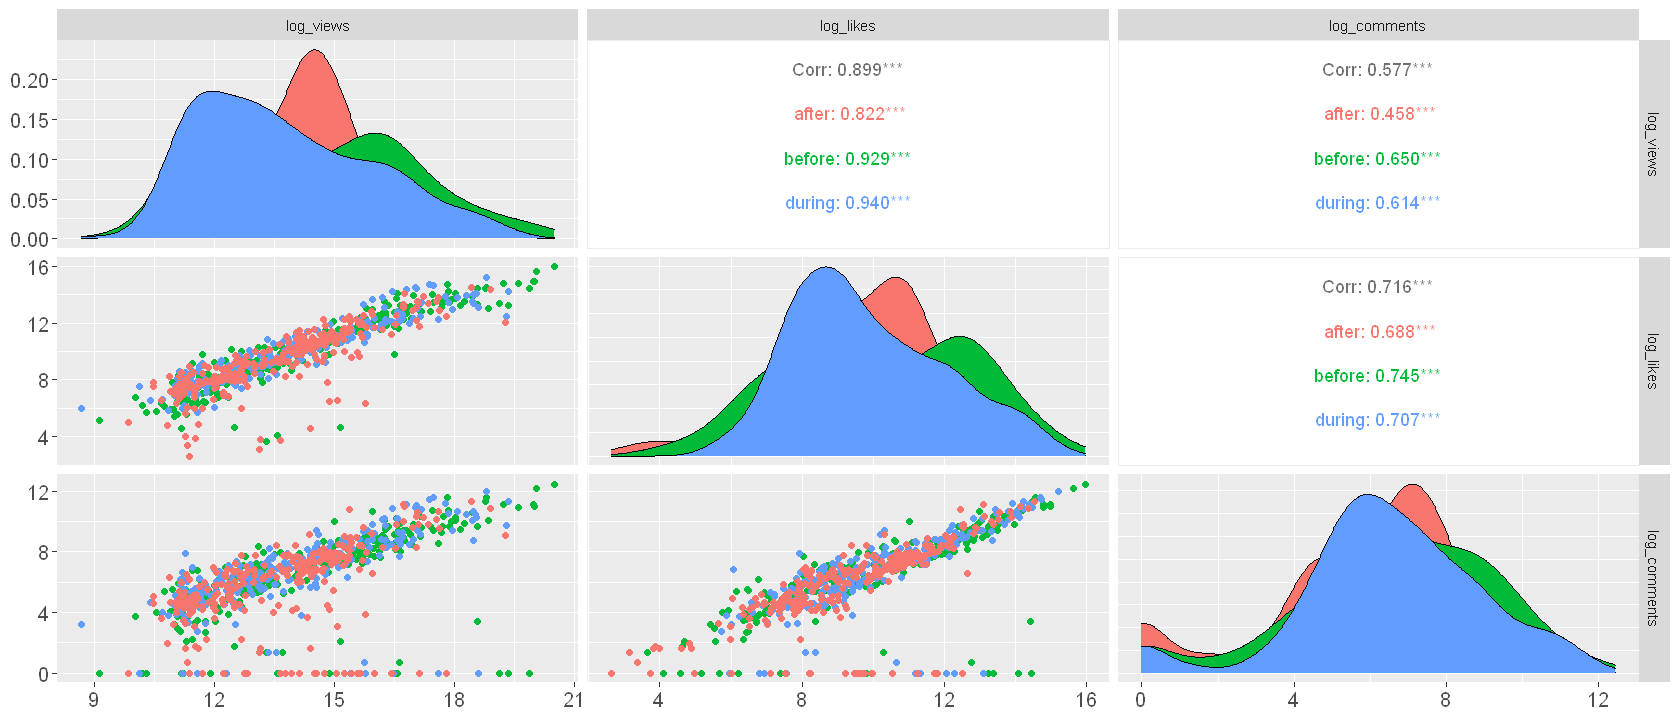

In [57]:
ggpairs(data = dat1, columns = c(21,22,23),mapping=aes(color=timePeriod)) +
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

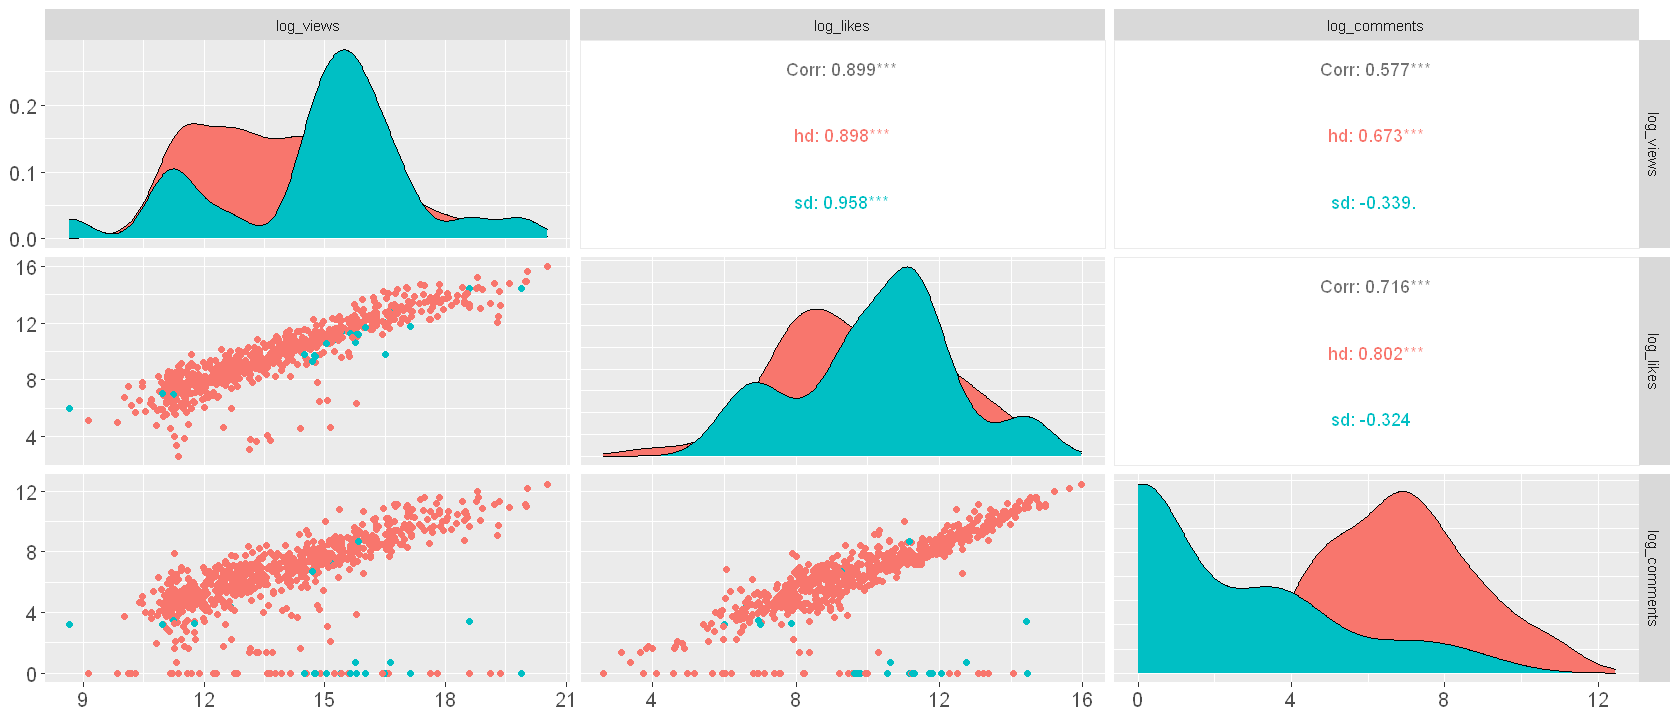

In [56]:
ggpairs(data = dat1, columns = c(21,22,23),mapping=aes(color=definition)) +
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

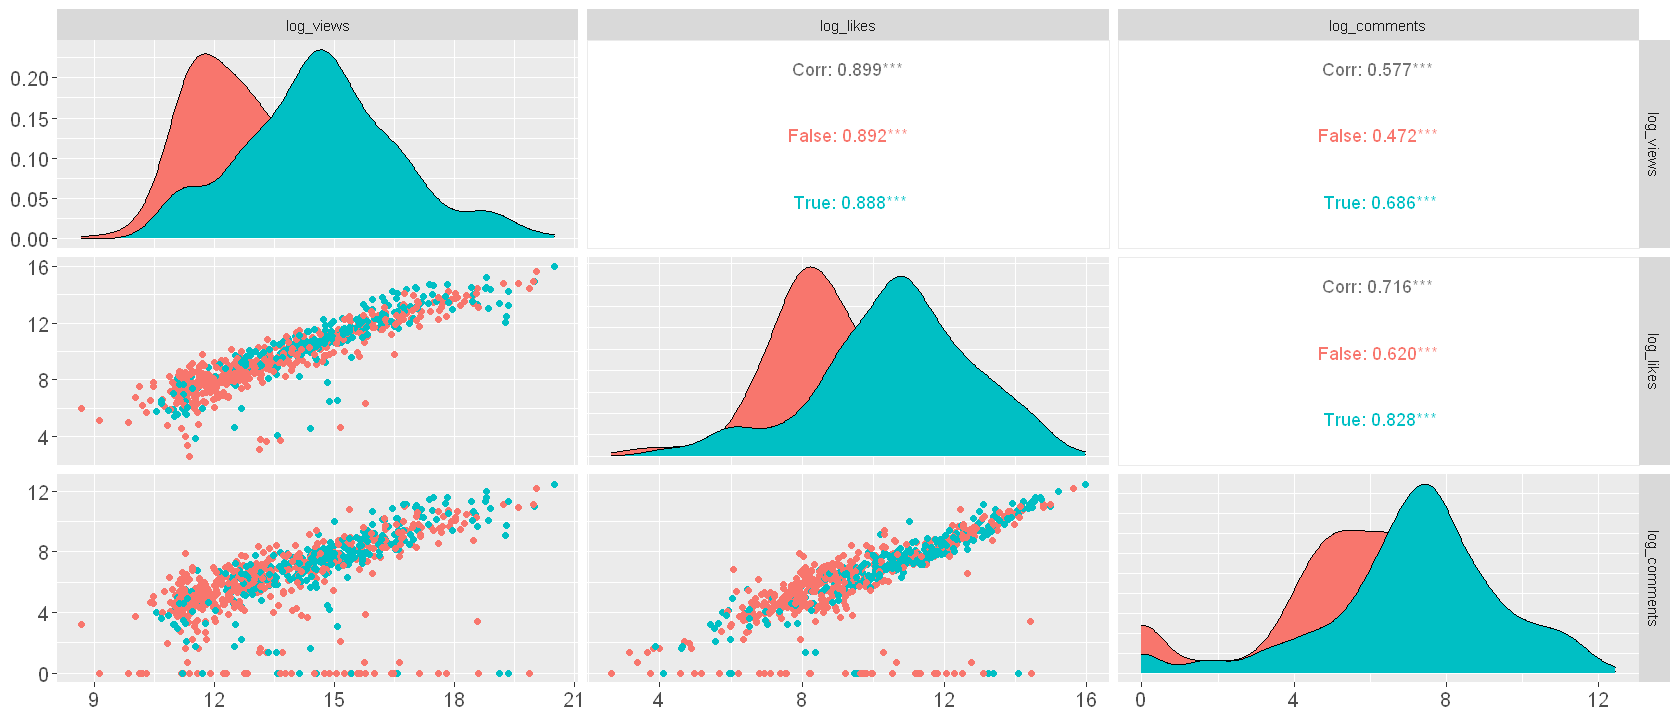

In [55]:
ggpairs(data = dat1, columns = c(21,22,23),mapping=aes(color=caption)) +
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))

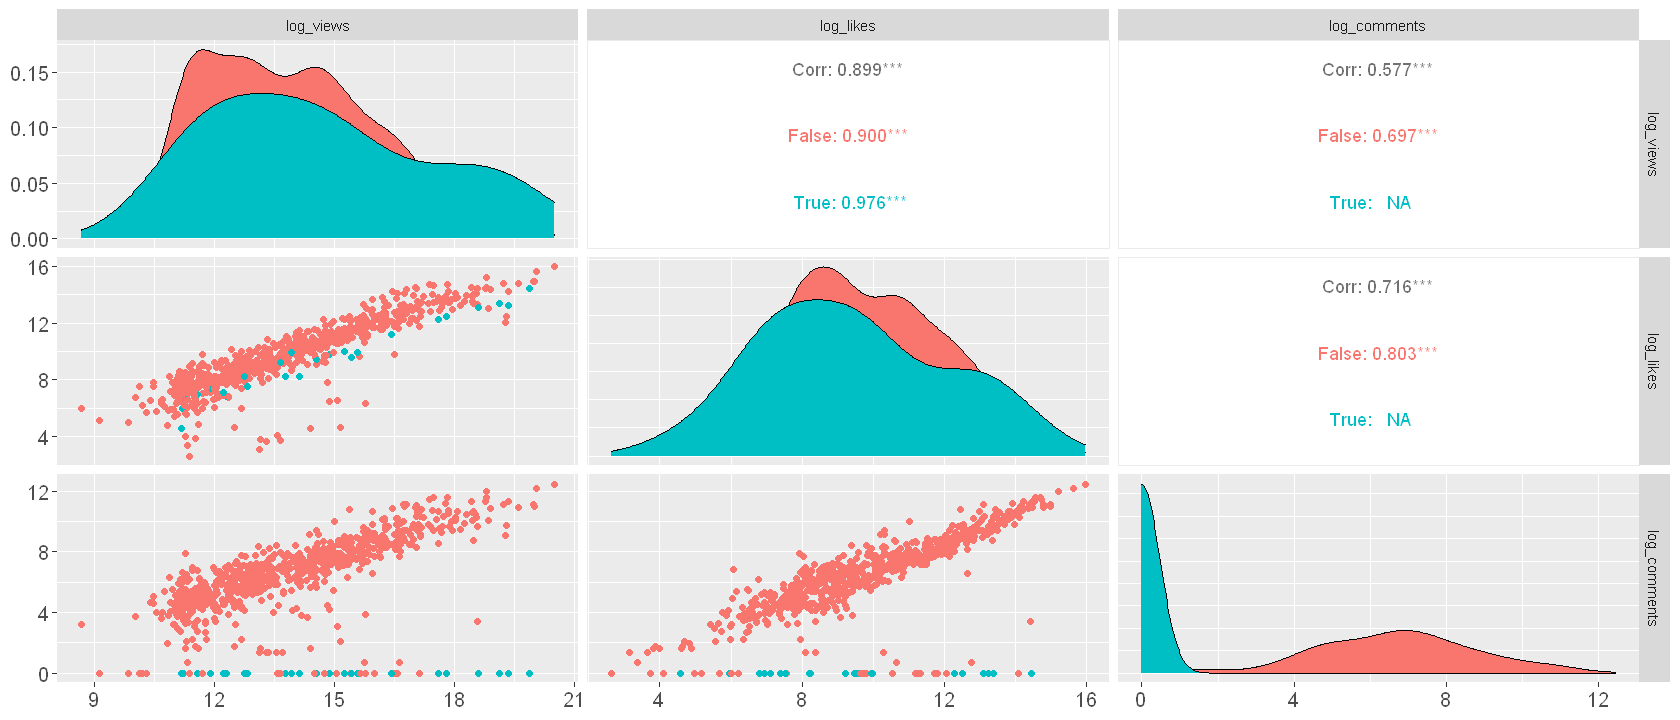

In [54]:
ggpairs(data = dat1, columns = c(21,22,23),mapping=aes(color=madeForKids)) +
    theme(axis.text.x = element_text(size=12), axis.text.y = element_text(size=12))